<a href="https://colab.research.google.com/github/AmbrishPathak/Disease-Progression-Prediction-Using-Linear-Regression-in-Python/blob/main/Disease_Progression_Prediction_Using_Linear_Regression_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import plotly.express as px
import itertools
from sklearn.model_selection import train_test_split
from itertools import combinations


url = "https://hastie.su.domains/Papers/LARS/diabetes.data"

df =pd.read_csv(url, sep='\s+')

#df.head(10)

### **1) Predict the feature ‘y’ using a single feature of ‘X’ (in the entire dataset) Find out which feature from ‘X’ should be used for the best prediction of ‘y’**

     AGE  SEX   BMI      BP   S1     S2    S3    S4      S5   S6
0     59    2  32.1  101.00  157   93.2  38.0  4.00  4.8598   87
1     48    1  21.6   87.00  183  103.2  70.0  3.00  3.8918   69
2     72    2  30.5   93.00  156   93.6  41.0  4.00  4.6728   85
3     24    1  25.3   84.00  198  131.4  40.0  5.00  4.8903   89
4     50    1  23.0  101.00  192  125.4  52.0  4.00  4.2905   80
..   ...  ...   ...     ...  ...    ...   ...   ...     ...  ...
437   60    2  28.2  112.00  185  113.8  42.0  4.00  4.9836   93
438   47    2  24.9   75.00  225  166.0  42.0  5.00  4.4427  102
439   60    2  24.9   99.67  162  106.6  43.0  3.77  4.1271   95
440   36    1  30.0   95.00  201  125.2  42.0  4.79  5.1299   85
441   36    1  19.6   71.00  250  133.2  97.0  3.00  4.5951   92

[442 rows x 10 columns]

Feature: AGE
• Model's coefficients:
    Slope: 1.1050
    Y-intercept: 98.52308429923738


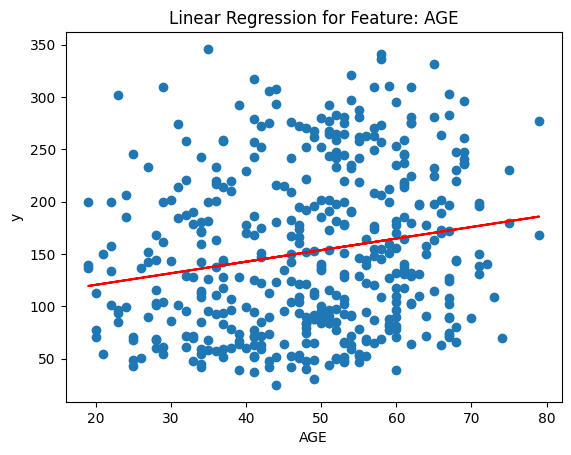


Feature: SEX
• Model's coefficients:
    Slope: 6.6454
    Y-intercept: 142.3758865248227


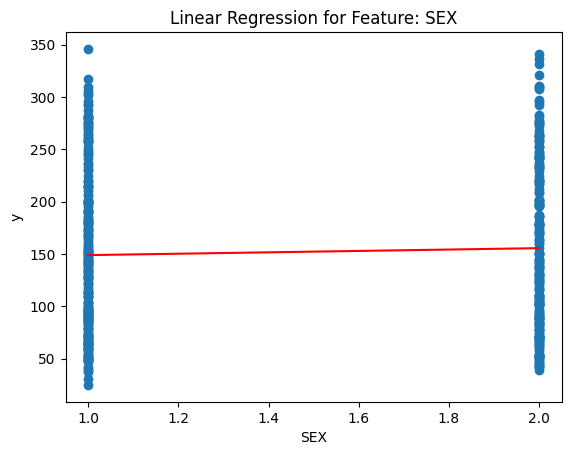


Feature: BMI
• Model's coefficients:
    Slope: 10.2331
    Y-intercept: -117.77336656656527


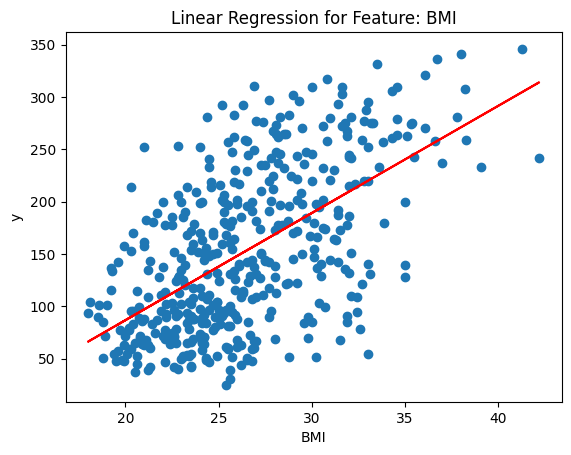


Feature: BP
• Model's coefficients:
    Slope: 2.4607
    Y-intercept: -80.76795381623236


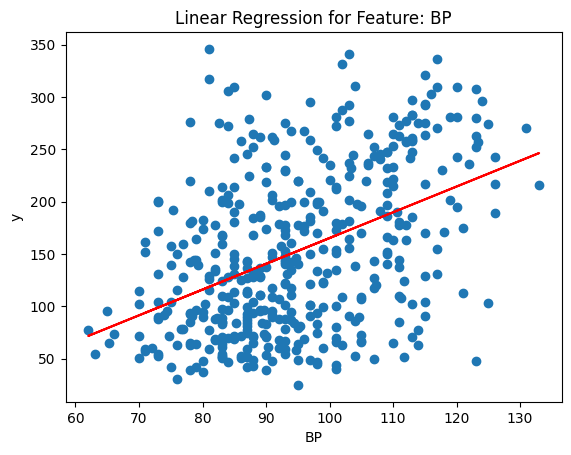


Feature: S1
• Model's coefficients:
    Slope: 0.4723
    Y-intercept: 62.802166216399584


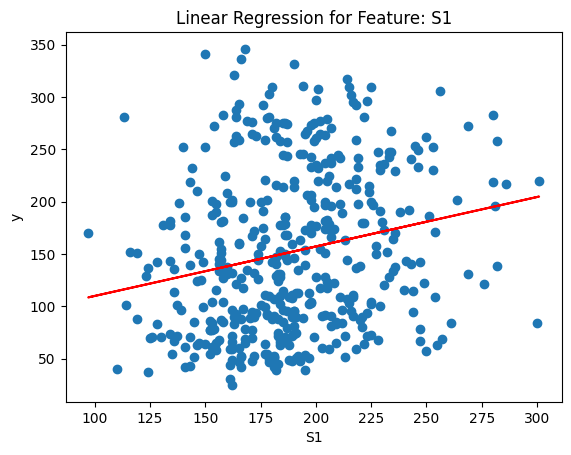


Feature: S2
• Model's coefficients:
    Slope: 0.4412
    Y-intercept: 101.20149769108342


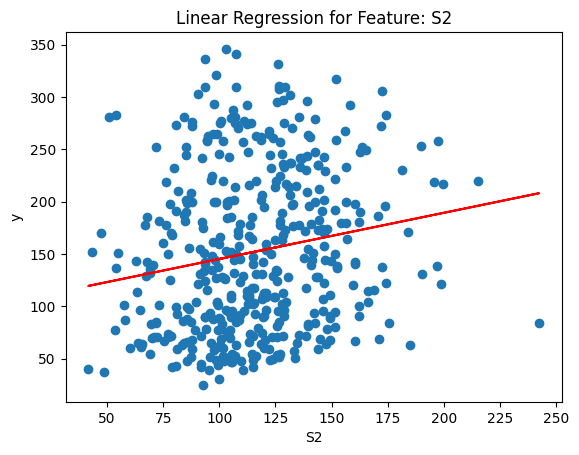


Feature: S3
• Model's coefficients:
    Slope: -2.3531
    Y-intercept: 269.2907838409806


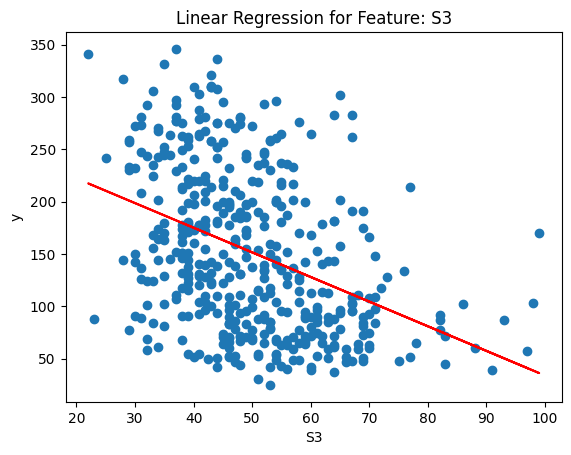


Feature: S4
• Model's coefficients:
    Slope: 25.7158
    Y-intercept: 47.463921047594496


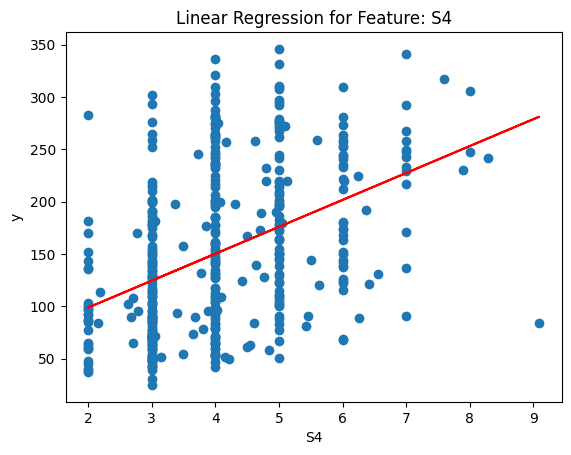


Feature: S5
• Model's coefficients:
    Slope: 83.5114
    Y-intercept: -235.4774316219658


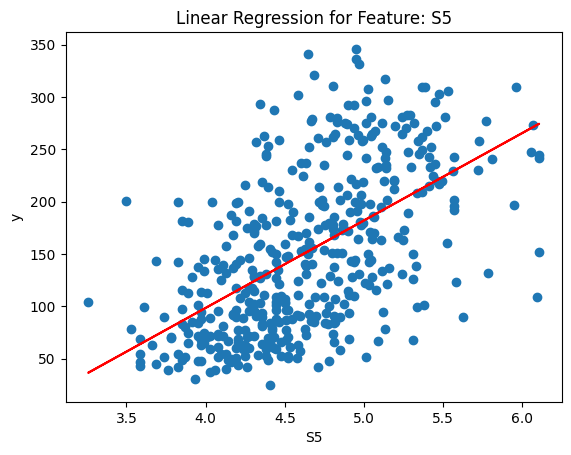


Feature: S6
• Model's coefficients:
    Slope: 2.5649
    Y-intercept: -81.93857931476984


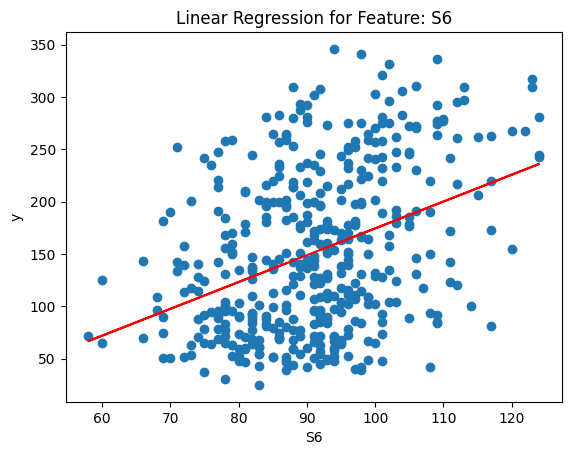


The best feature for prediction is: BMI
• MSE with the best feature: 3890.4566


In [ ]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]


def evaluate_feature(feature):
    model = LinearRegression()

    X_train = X[[feature]]

    model.fit(X_train, y)

    y_pred = model.predict(X_train)

    mse = mean_squared_error(y, y_pred)

    print(f"\nFeature: {feature}")
    print(f"• Model's coefficients:")
    print(f"    Slope: {model.coef_[0]:.4f}")
    print(f"    Y-intercept: {model.intercept_}")


    plt.scatter(X_train, y)
    plt.plot(X_train, y_pred, color='red')
    plt.xlabel(feature)
    plt.ylabel('y')
    plt.title(f"Linear Regression for Feature: {feature}")
    plt.show()

    return mse

# Evaluate features and find the best feature
best_feature = None
best_mse = float('inf')
for feature in X.columns:
    mse = evaluate_feature(feature)
    if mse < best_mse:
        best_feature = feature
        best_mse = mse

print(f"\nThe best feature for prediction is: {best_feature}")
print(f"• MSE with the best feature: {best_mse:.4f}")

### **2) Predict the feature ‘y’ using a pair feature of ‘X’ (in the entire dataset) Find out which pair feature from ‘X’ should be used for the best prediction of ‘y’.**

Best Feature Pair for Prediction: ('BMI', 'S5')
Best MSE: 2901.836941556704
Model's Coefficients (Slope): [ 7.89075942 51.25033673]
Model's Intercept: -294.216745606151


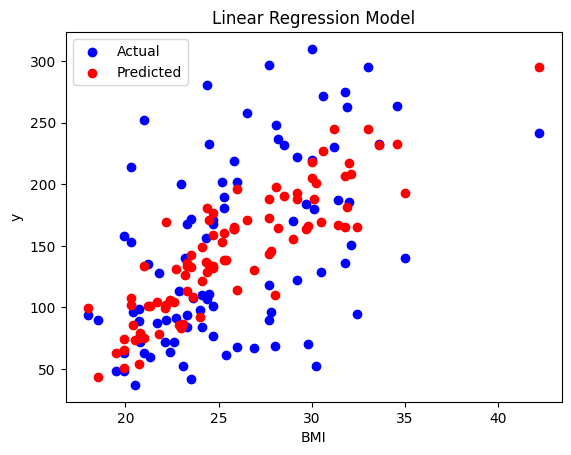

In [ ]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

best_feature_pair = None
best_mse = float('inf')

best_slope = None
best_intercept = None

feature_pairs = list(combinations(X.columns, 2))

for pair in feature_pairs:
    X_pair = X[list(pair)]

    X_train, X_test, y_train, y_test = train_test_split(X_pair, y, test_size=0.2, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)

    if mse < best_mse:
        best_mse = mse
        best_feature_pair = pair
        best_slope = model.coef_
        best_intercept = model.intercept_

print(f"Best Feature Pair for Prediction: {best_feature_pair}")
print(f"Best MSE: {best_mse}")

print(f"Model's Coefficients (Slope): {best_slope}")
print(f"Model's Intercept: {best_intercept}")

X_best_pair = X[list(best_feature_pair)]
X_train, X_test, y_train, y_test = train_test_split(X_best_pair, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

plt.scatter(X_test.iloc[:, 0], y_test, color='blue', label='Actual')
plt.scatter(X_test.iloc[:, 0], y_pred, color='red', label='Predicted')
plt.title('Linear Regression Model')
plt.xlabel(best_feature_pair[0])
plt.ylabel('y')
plt.legend()
plt.show()


### **3) Predict the feature ‘y’ using all (10) features of ‘X’ (in the entire dataset)**

In [ ]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

print("Model's Coefficients:")
for i, coef in enumerate(model.coef_):
    print(f"Feature {i+1}: {coef}")

mse = mean_squared_error(y, y_pred)
print(f"\nMean Squared Error (MSE): {mse:.2f}")

Model's Coefficients:
Feature 1: -0.0363612242236198
Feature 2: -22.859648090498386
Feature 3: 5.602962091923707
Feature 4: 1.1168079933181891
Feature 5: -1.0899963340632208
Feature 6: 0.7464504555142053
Feature 7: 0.3720047150891326
Feature 8: 6.533831935990338
Feature 9: 68.48312496478829
Feature 10: 0.2801169893214963

Mean Squared Error (MSE): 2859.70


### 4) Compute the training MSE and validation MSE when fihng the regressor in all features, for the following training setsizes: n_train = 20 ,n_train = 50,n_train = 100, n_train = 200

In [ ]:
train_sizes = [20, 50, 100, 200]

for n_train in train_sizes:
    print(f"\nTraining Set Size: {n_train}")
    X = df.drop('Y', axis=1)
    y = df['Y']

    X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=n_train, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_valid_pred = model.predict(X_valid)

    train_mse = mean_squared_error(y_train, y_train_pred)
    valid_mse = mean_squared_error(y_valid, y_valid_pred)

    print(f"Training MSE: {train_mse:.2f}")
    print(f"Validation MSE: {valid_mse:.2f}")



Training Set Size: 20
Training MSE: 2066.51
Validation MSE: 15905.60

Training Set Size: 50
Training MSE: 2863.62
Validation MSE: 3907.02

Training Set Size: 100
Training MSE: 3150.51
Validation MSE: 3423.45

Training Set Size: 200
Training MSE: 2854.95
Validation MSE: 3014.92


### **Extra Credit:XGBoost Task 1**

In [ ]:
import xgboost as xgb

X = df.drop('Y', axis=1)
y = df['Y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

mse_xgb_list = []

for feature in X.columns:

    X_train_feat = X_train[[feature]]
    X_test_feat = X_test[[feature]]


    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
    xgb_model.fit(X_train_feat, y_train)

    y_pred_xgb = xgb_model.predict(X_test_feat)
    mse_xgb = mean_squared_error(y_test, y_pred_xgb)
    mse_xgb_list.append(mse_xgb)

best_xgb_feature = X.columns[mse_xgb_list.index(min(mse_xgb_list))]

print(f"Best feature for XGBoost: {best_xgb_feature}, MSE: {min(mse_xgb_list):.2f}")



Best feature for XGBoost: BMI, MSE: 4512.78


### **Extra Credit:XGBoost Task 2**

In [ ]:
import xgboost as xgb
X = df.drop('Y', axis=1)
y = df['Y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

best_pair = ()
best_mse = float('inf')

for i in range(len(X.columns)):
    for j in range(i + 1, len(X.columns)):
        feature_pair = [X.columns[i], X.columns[j]]

        X_train_pair = X_train[feature_pair]
        X_test_pair = X_test[feature_pair]

        xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
        xgb_model.fit(X_train_pair, y_train)

        y_pred = xgb_model.predict(X_test_pair)

        mse = mean_squared_error(y_test, y_pred)

        if mse < best_mse:
            best_mse = mse
            best_pair = feature_pair

print(f"Best pair of features: {best_pair}, MSE: {best_mse:.2f}")


Best pair of features: ['BMI', 'S4'], MSE: 3612.18


### **Extra Credit:XGBoost Task 3**

In [ ]:
import xgboost as xgb
X = df.drop('Y', axis=1)
y = df['Y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse:.2f}")


MSE: 3351.00


### **Extra Credit:XGBoost Task 4**

In [ ]:
import xgboost as xgb

X = df.drop('Y', axis=1)
y = df['Y']

train_sizes = [20, 50, 100, 200]

for n_train in train_sizes:
    print(f"Training Set Size: {n_train}")

    X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=n_train, random_state=42)

    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
    xgb_model.fit(X_train, y_train)

    y_train_pred = xgb_model.predict(X_train)
    train_mse = mean_squared_error(y_train, y_train_pred)
    print(f"Training MSE: {train_mse:.2f}")

    y_valid_pred = xgb_model.predict(X_valid)
    valid_mse = mean_squared_error(y_valid, y_valid_pred)
    print(f"Validation MSE: {valid_mse:.2f}")
    print()


Training Set Size: 20
Training MSE: 0.00
Validation MSE: 5940.95

Training Set Size: 50
Training MSE: 0.00
Validation MSE: 5399.10

Training Set Size: 100
Training MSE: 0.00
Validation MSE: 4115.18

Training Set Size: 200
Training MSE: 0.00
Validation MSE: 4004.05



## **Comparision**



 1.   **Task 1**

  *   Linear-regression(MSE) : 3890.4566
  *   XGBoost(MSE) : 4512.78

2.   **Task 2**
  *   Linear-regression(MSE) : 2901.836941556704
  *   XGBoost(MSE) : 3612.18
3.   **Task 3**
  *   Linear-regression(MSE) : 2859.70
  *   XGBoost(MSE) : 3351.00
4.   **Task 4**
  *   Linear-regression(MSE) :3014.92
  *   XGBoost(MSE) :4004.05


**Based on above MSE coparison bewteen Linear-regression and XGBoost we conclude that Linear regression performs better in this specific cases.**



